In [1]:
import pandas as pd
import numpy as nm
rent_ds = pd.read_csv('House_Rent_Dataset.csv')
rent_ds.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [2]:
rent_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [3]:
rent_ds['Posted On'] = pd.to_datetime(rent_ds['Posted On'])

In [4]:
rent_ds.columns =rent_ds.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
rent_ds.head()

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
def get_missing_report(df):
    missing_df = (df.isnull().sum()/len(df)).rename_axis('columns').to_frame('missing_perc').reset_index()
    missing_df['missing_perc'] = missing_df['missing_perc'] * 100
    missing_df['type'] = missing_df['columns'].apply(lambda col: str(df[col].dtypes))
    return missing_df.sort_values(by = 'missing_perc', ascending=False)
get_missing_report(rent_ds)

,columns,missing_perc,type
0,posted_on,0.0,datetime64[ns]
1,bhk,0.0,int64
2,rent,0.0,int64
3,size,0.0,int64
4,floor,0.0,object
5,area_type,0.0,object
6,area_locality,0.0,object
7,city,0.0,object
8,furnishing_status,0.0,object
9,tenant_preferred,0.0,object


In [7]:
rent_ds['floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [8]:
mapped = []
for f in rent_ds['floor']:
    first_word = f.split()[0]
    
    if first_word == 'Ground':
        mapped.append(0)
    elif first_word == 'Upper':
        mapped.append(-1)
    elif first_word == 'Lower':
        mapped.append(-2)
    else:
        mapped.append(first_word)  

rent_ds['mapped_floor'] = mapped

In [9]:
rent_ds.head()

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,mapped_floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1


In [10]:
rent_ds=rent_ds.drop('floor', axis=1)

In [11]:
rent_ds['mapped_floor'].dtype

dtype('O')

In [12]:
rent_ds['mapped_floor']= pd.to_numeric(rent_ds['mapped_floor'])

In [13]:
rent_ds[rent_ds.duplicated()]

,posted_on,bhk,rent,size,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,mapped_floor
72,2022-06-26,2,16000,850,Carpet Area,Salt Lake City Sector 1,Kolkata,Semi-Furnished,Bachelors,1,Contact Agent,1
429,2022-06-03,2,5500,450,Carpet Area,Bisharpara,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1


In [14]:
rent_ds = rent_ds.drop_duplicates()

<Axes: xlabel='city', ylabel='count'>

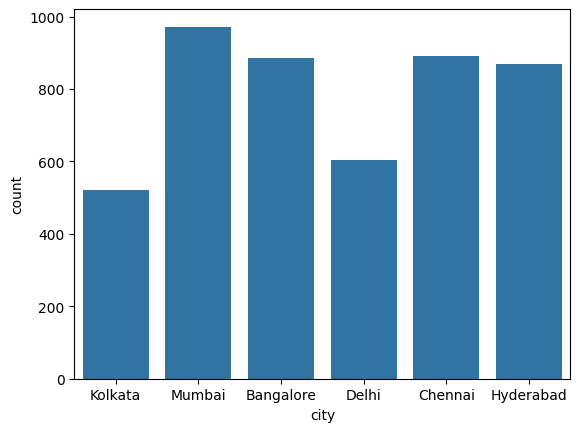

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=rent_ds, x='city') 

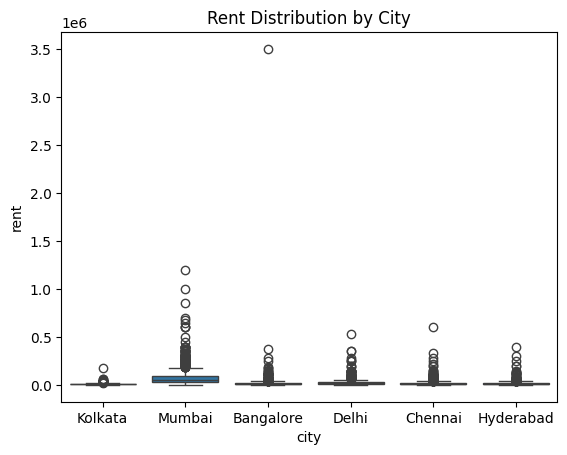

In [16]:
sns.boxplot(data=rent_ds, x='city', y='rent')
plt.title('Rent Distribution by City')
plt.show()

In [17]:
rent_ds['rent_per_sqft'] = rent_ds['rent']/rent_ds['size']
rent_ds.head(3)

,posted_on,bhk,rent,size,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,mapped_floor,rent_per_sqft
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,9.090909
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,25.000000
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,17.000000


In [18]:
def label_city_quartiles(group):
    q1 = group['rent_per_sqft'].quantile(0.25)
    q3 = group['rent_per_sqft'].quantile(0.75)
    
    def category(val):
        if val <= q1:
            return 'Affordable'
        elif val <= q3:
            return 'Mid-range'
        else:
            return 'Premium'
    
    group['affordability'] = group['rent_per_sqft'].apply(category)
    return group

rent_ds = rent_ds.groupby('city', group_keys=False).apply(label_city_quartiles)


/var/folders/g6/1tx3zq8d07nc_s5_t26ry69r0000gn/T/ipykernel_94353/1416439473.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rent_ds = rent_ds.groupby('city', group_keys=False).apply(label_city_quartiles)


In [19]:
rent_ds.head(5)

,posted_on,bhk,rent,size,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,mapped_floor,rent_per_sqft,affordability
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,9.090909,Affordable
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,25.000000,Premium
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,17.000000,Mid-range
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,12.500000,Mid-range
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,8.823529,Affordable


In [20]:
rent_ds.query('affordability == "Premium" and city == "Mumbai"')['area_locality'].unique()

array(['parivar safalya chs', 'Trump Tower, Worli',
       'Hiranandani Castle Rock, Powai', 'Bandra West',
       'Runwal Elegante, Andheri West', 'Cuffe Parade', 'Prabhadevi',
       'shivsagar', 'Lodha New Cuffe Parade, Wadala', 'Breach Candy',
       'Lodha World Crest, Lower Parel', 'darshan ricco Tower',
       'Khar West', 'India Bulls Sky Forest, Lower Parel',
       'Oberoi Splendor Grande, Agarkar Chowk',
       'Beach Towers, Prabhadevi', 'Juhu Tara',
       'Oberoi Esquire, Goregaon East', 'Lokhandwala Complex',
       'GREEN PARK', 'Lodha Ajuro tower lalbag',
       'Bombay Dyeing Two ICC, Dadar East', 'Vile Parle East',
       'Lodha The Park, Worli', 'Khar', 'Insignia, Bandra East',
       'Lodha Primero, Mahalakshmi', 'Lodha Altia, Wadala East',
       'Rustomjee Seasons, Bandra East', 'Juhu', 'Ashok tower, Parel',
       'Chaitanya Towers, Prabhadevi', 'Lodha NCP Commercial , Wadala',
       'Mount Marry, Bandra West', 'Lower Parel',
       'Mount Marry, Mount Mary', '

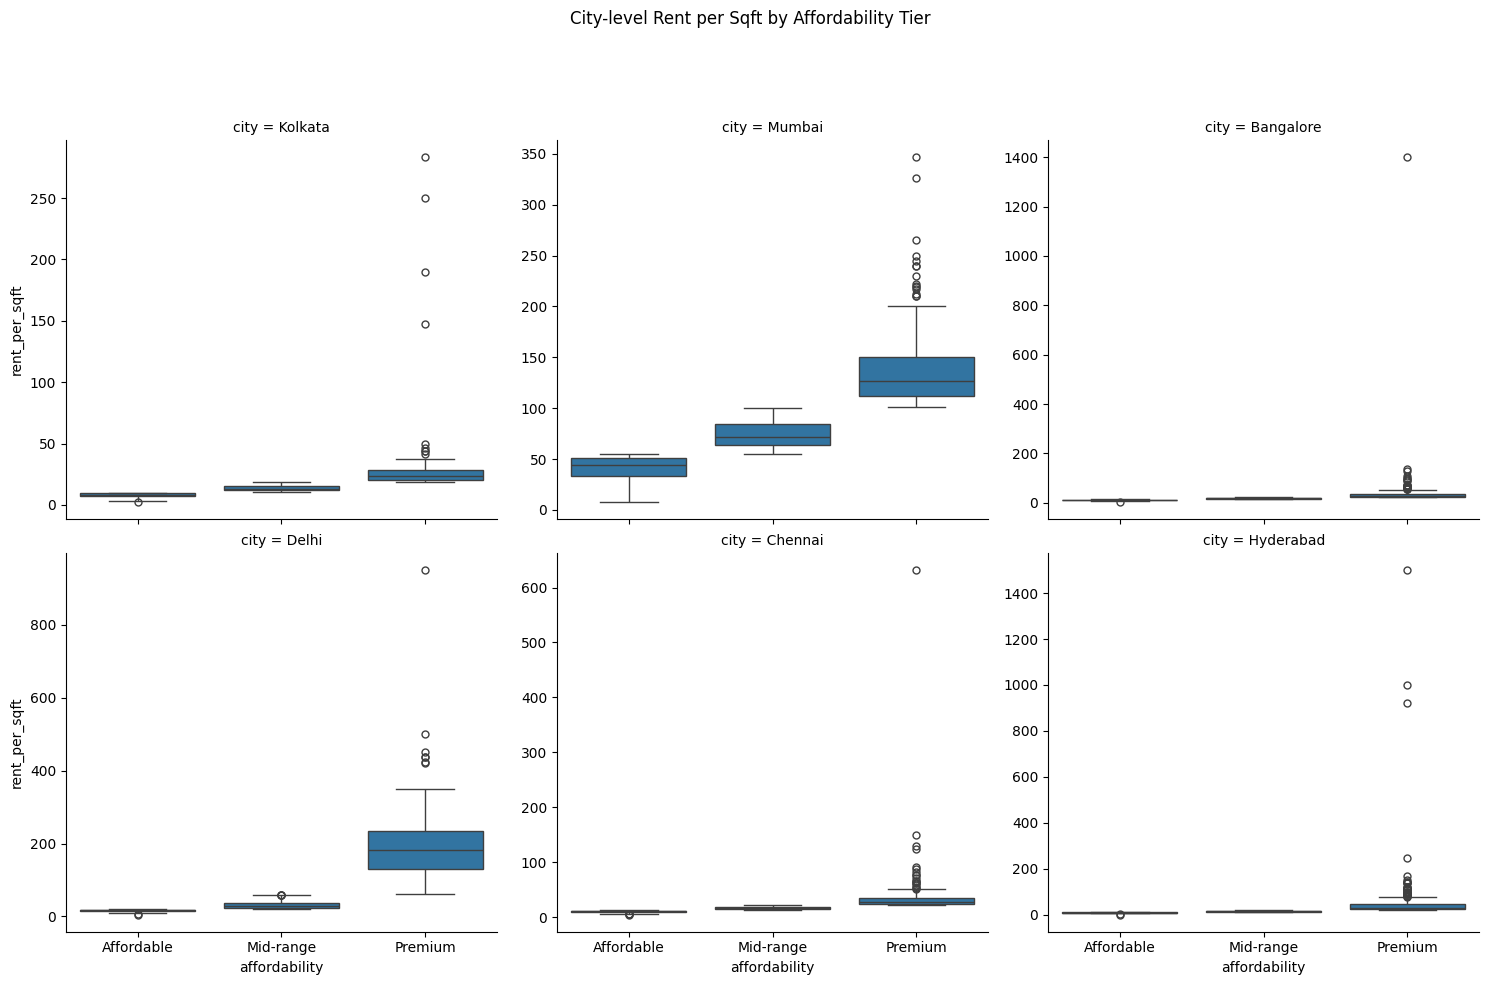

In [21]:
g = sns.catplot(
    data=rent_ds,
    x='affordability',
    y='rent_per_sqft',
    col='city',
    kind='box',
    order=['Affordable', 'Mid-range', 'Premium'],  # adjust names to match your column
    col_wrap=3,
    sharey=False
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('City-level Rent per Sqft by Affordability Tier')
plt.show()

In [22]:
def get_outliers_citywise(df):
    outlier_rows = []

    for city, group in df.groupby('city'):
        q1 = group['rent_per_sqft'].quantile(0.25)
        q3 = group['rent_per_sqft'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 0.5 * iqr
        upper = q3 + 3 * iqr
        
        # Mark rows that are outliers for this city
        city_outliers = group[(group['rent_per_sqft'] < lower) | (group['rent_per_sqft'] > upper)]
        outlier_rows.append(city_outliers)

    return pd.concat(outlier_rows)

# Get outliers
outliers_df = get_outliers_citywise(rent_ds)

In [23]:
rent_ds_new= rent_ds.drop(outliers_df.index)

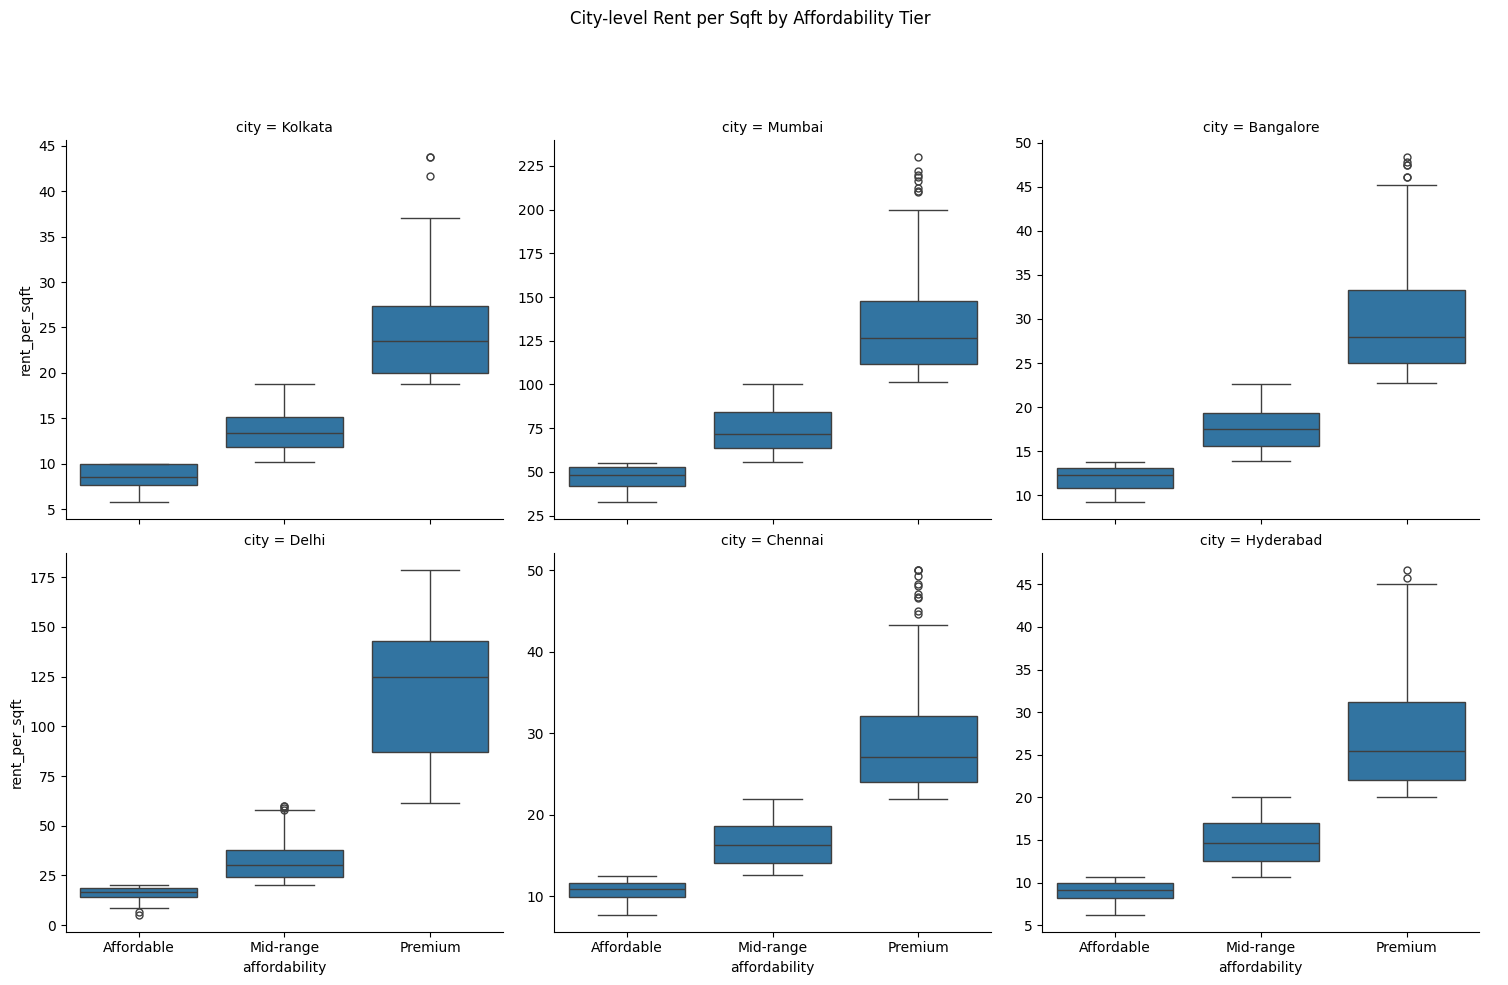

In [24]:
g = sns.catplot(
    data=rent_ds_new,
    x='affordability',
    y='rent_per_sqft',
    col='city',
    kind='box',
    order=['Affordable', 'Mid-range', 'Premium'], 
    col_wrap=3,
    sharey=False
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('City-level Rent per Sqft by Affordability Tier')
plt.show()

In [25]:
rent_ds_new.shape

(4423, 14)

In [26]:
rent_ds.shape

(4744, 14)

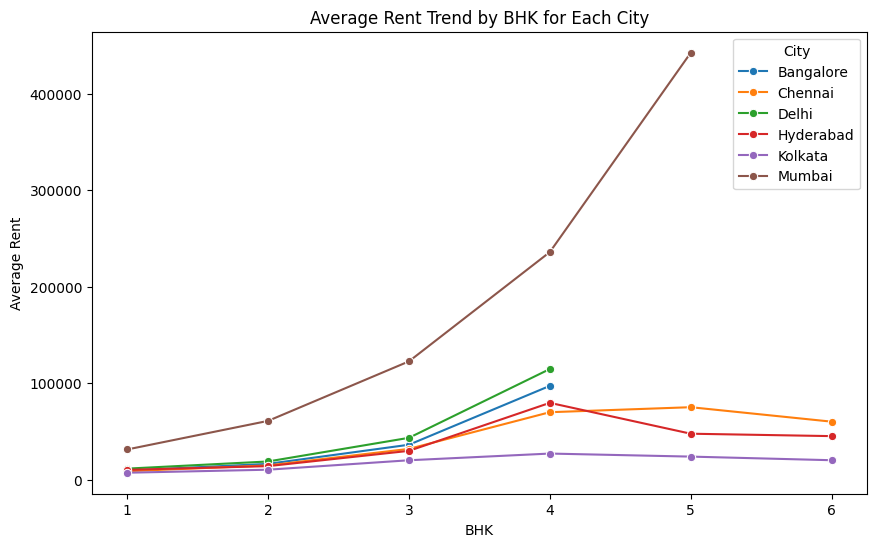

In [27]:
trend_df = rent_ds_new.groupby(['city', 'bhk'])['rent'].mean().reset_index()

# Plot trend: x = BHK, y = avg rent, one line per city
plt.figure(figsize=(10,6))
sns.lineplot(data=trend_df, x='bhk', y='rent', hue='city', marker='o')

plt.title("Average Rent Trend by BHK for Each City")
plt.xlabel("BHK")
plt.ylabel("Average Rent")
plt.legend(title="City")
plt.show()

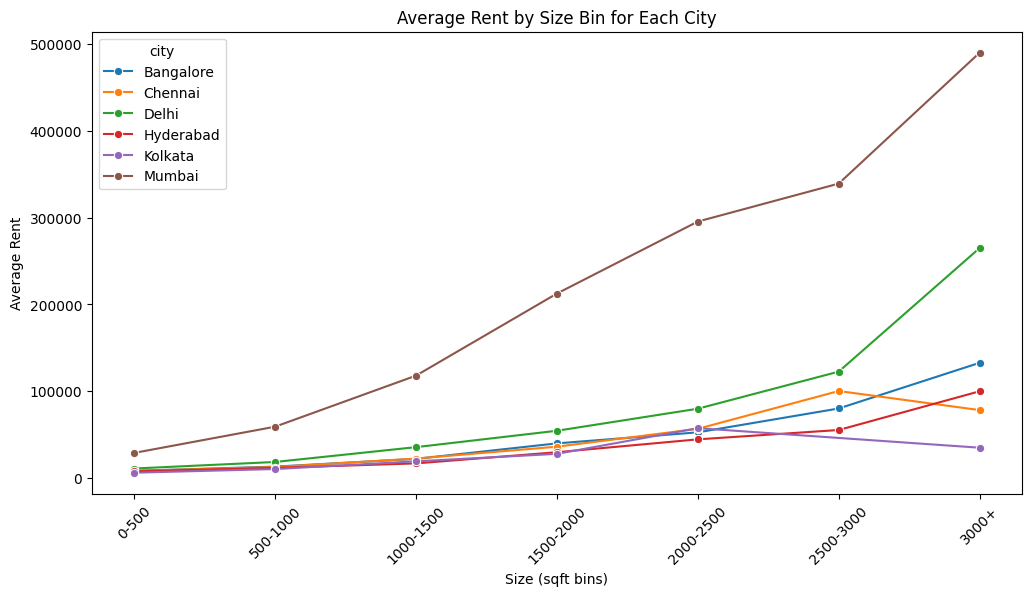

In [28]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, rent_ds['size'].max()]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', 
          '2000-2500', '2500-3000', '3000+']

rent_ds_new['size_bin'] = pd.cut(rent_ds_new['size'], bins=bins, labels=labels, include_lowest=True)

# 2. Group by city and size_bin, then compute avg rent
city_size_trend = rent_ds_new.groupby(['city', 'size_bin'], observed=False)['rent'].mean().reset_index()

# 3. Plot line trend for each city
plt.figure(figsize=(12,6))
sns.lineplot(data=city_size_trend, x='size_bin', y='rent', hue='city', marker="o")

plt.title("Average Rent by Size Bin for Each City")
plt.xlabel("Size (sqft bins)")
plt.ylabel("Average Rent")
plt.xticks(rotation=45)
plt.show()

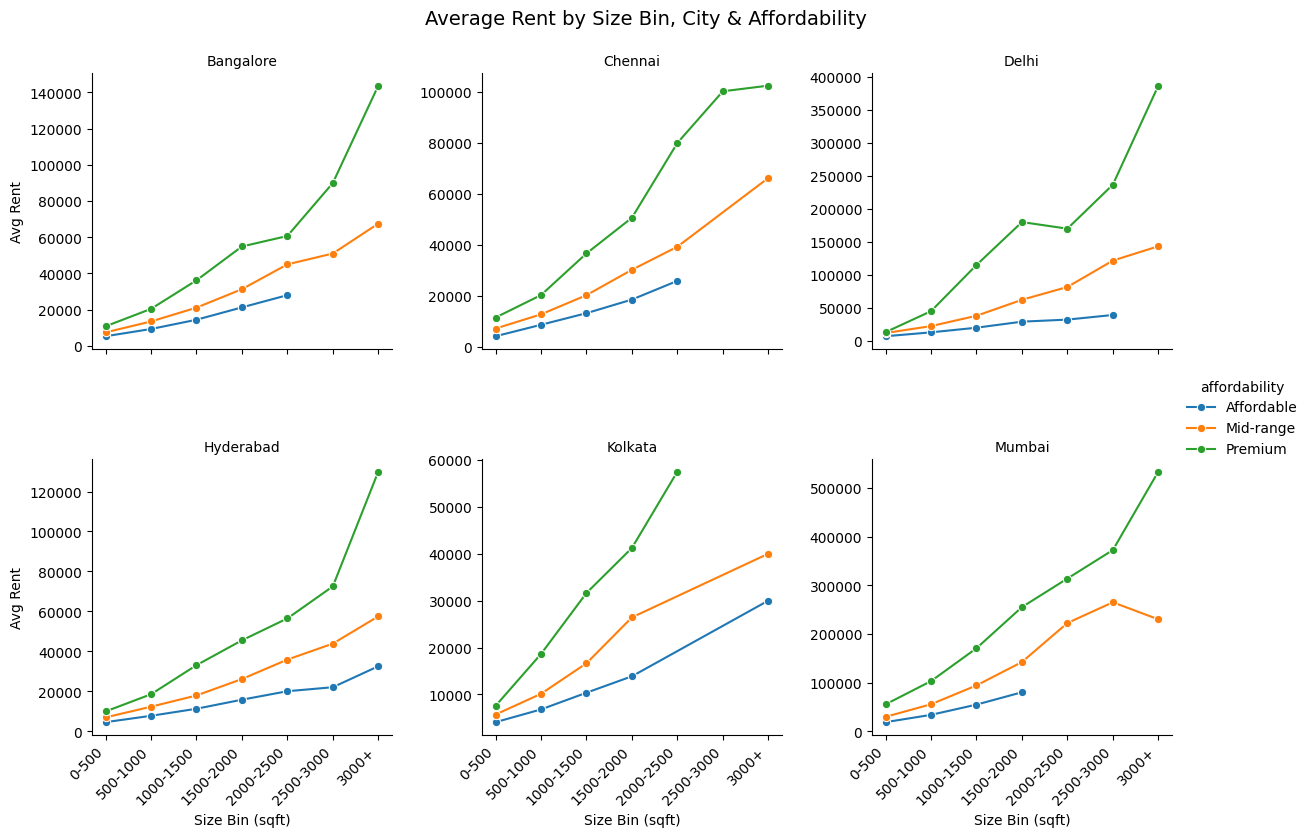

In [33]:
area_trend = (
    rent_ds_new
    .groupby(['city', 'affordability', 'size_bin'], observed=True)['rent']
    .mean()
    .reset_index()
)

# Plot
g = sns.FacetGrid(area_trend, col="city", hue="affordability", 
                  col_wrap=3, sharey=False, height=4)
g.map(sns.lineplot, "size_bin", "rent", marker="o")

g.add_legend()
g.set_axis_labels("Size Bin (sqft)", "Avg Rent")
g.set_titles("{col_name}")

for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")

plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.4)
g.fig.suptitle("Average Rent by Size Bin, City & Affordability", fontsize=14)
plt.show()

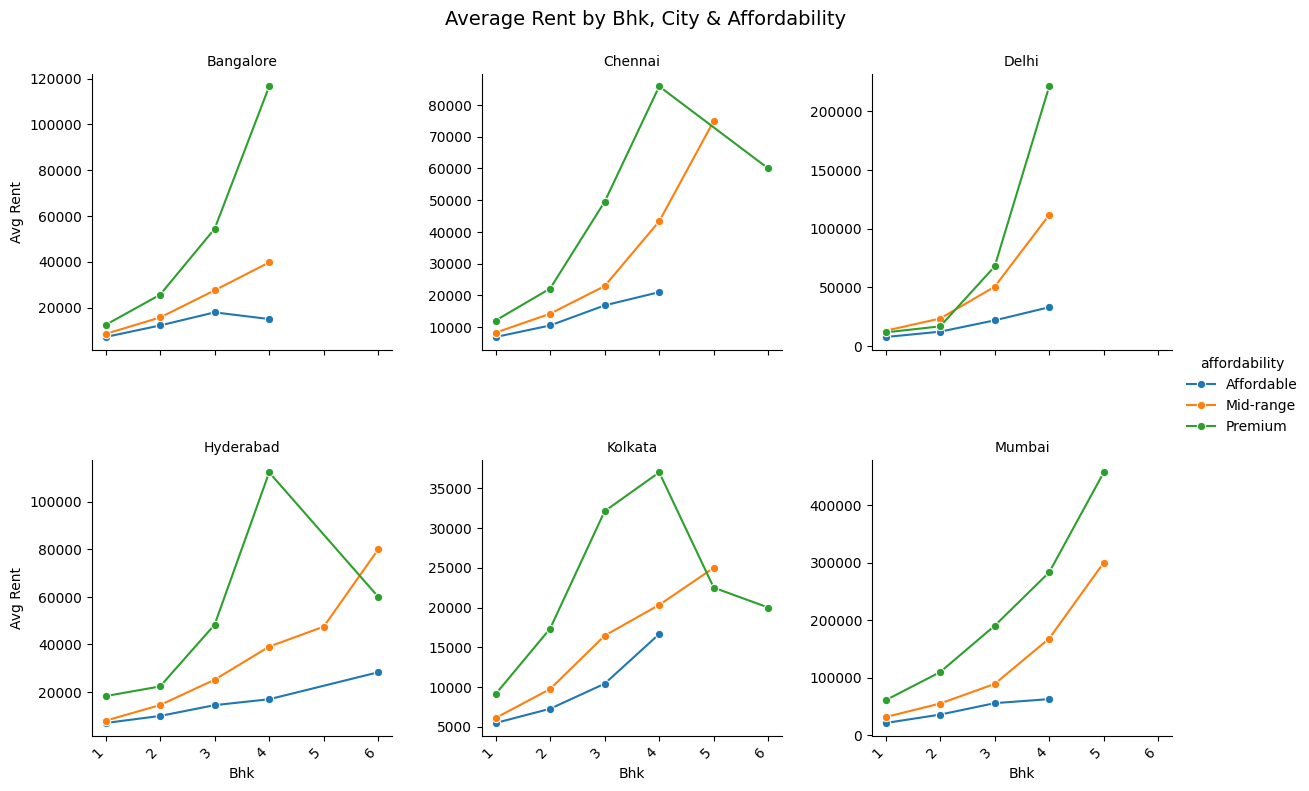

In [34]:
area_trend = (
    rent_ds_new
    .groupby(['city', 'affordability', 'bhk'], observed=True)['rent']
    .mean()
    .reset_index()
)

# Plot
g = sns.FacetGrid(area_trend, col="city", hue="affordability", 
                  col_wrap=3, sharey=False, height=4)
g.map(sns.lineplot, "bhk", "rent", marker="o")

g.add_legend()
g.set_axis_labels("Bhk", "Avg Rent")
g.set_titles("{col_name}")


for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment("right")

plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.4)
g.fig.suptitle("Average Rent by Bhk, City & Affordability", fontsize=14)
plt.show()

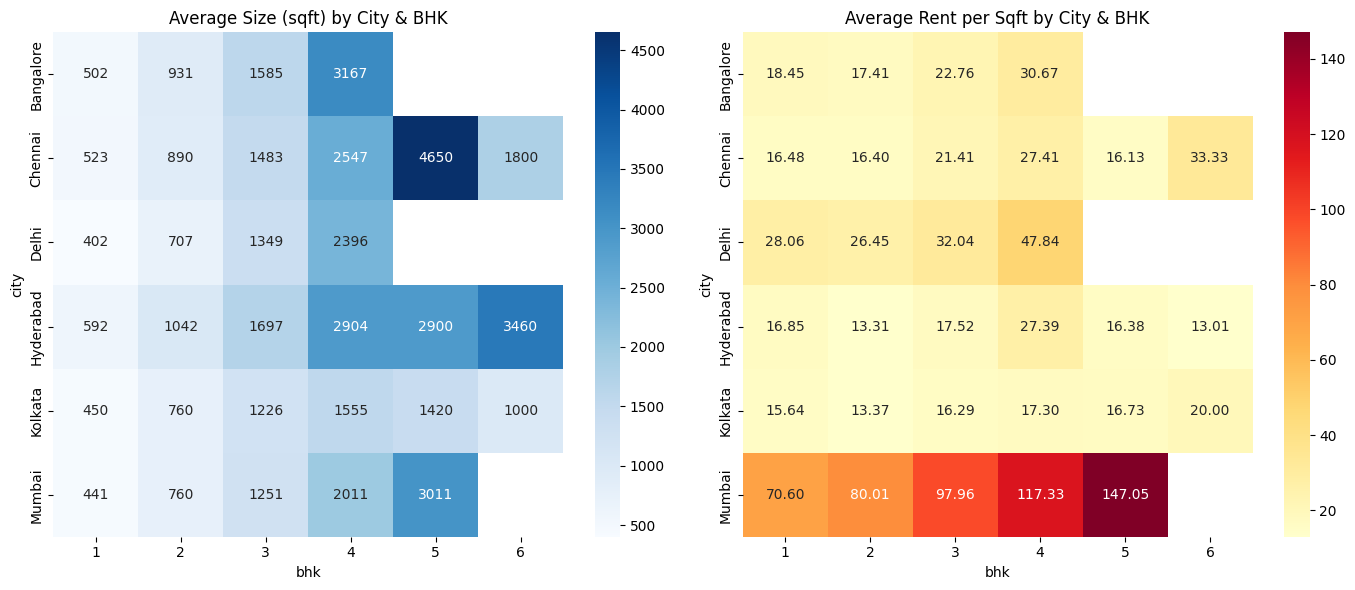

In [35]:
bhk_trend = (
    rent_ds_new
    .groupby(["city", "bhk"], observed=True)
    .agg(
        avg_size=("size", "mean"),
        avg_rent=("rent", "mean")
    )
    .reset_index()
)

bhk_trend["rent_per_sqft"] = bhk_trend["avg_rent"] / bhk_trend["avg_size"]

pivot_size = bhk_trend.pivot(index="city", columns="bhk", values="avg_size")
pivot_rentpsqft = bhk_trend.pivot(index="city", columns="bhk", values="rent_per_sqft")

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(pivot_size, annot=True, fmt=".0f", cmap="Blues", ax=axes[0])
axes[0].set_title("Average Size (sqft) by City & BHK")

sns.heatmap(pivot_rentpsqft, annot=True, fmt=".2f", cmap="YlOrRd", ax=axes[1])
axes[1].set_title("Average Rent per Sqft by City & BHK")

plt.tight_layout()
plt.show()

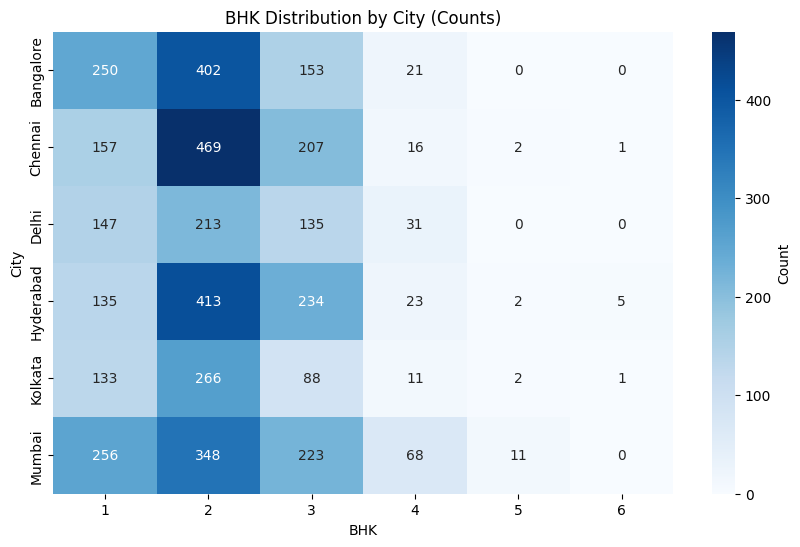

In [36]:
bhk_counts = (
    rent_ds_new.groupby(['city', 'bhk'])
    .size()
    .reset_index(name="count")
)

pivot_bhk = bhk_counts.pivot(index="city", columns="bhk", values="count").fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_bhk, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Count'}
)
plt.title("BHK Distribution by City (Counts)")
plt.xlabel("BHK")
plt.ylabel("City")
plt.show()

In [37]:
max_floor = rent_ds_new['mapped_floor'].max()
bins = list(range(-2, max_floor + 6, 6))   # from -2 up to max floor, step of 6

labels = [f"{bins[i]}–{bins[i+1]}" for i in range(len(bins)-1)]

rent_ds_new['floor_bin'] = pd.cut(
    rent_ds_new['mapped_floor'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

In [38]:
def floor_bin(floor):
    if floor >= -2 and floor <= 0:
        return "-2 to 0"
    elif floor >= 1 and floor <= 10:
        return "1 to 10"
    elif floor >= 11 and floor <= 20:
        return "11 to 20"
    elif floor >= 21 and floor <= 30:
        return "21 to 30"
    elif floor >= 31 and floor <= 40:
        return "31 to 40"
    elif floor >= 41 and floor <= 50:
        return "41 to 50"
    else:
        return "51+"
        
rent_ds_new['floor_bin'] = rent_ds_new['mapped_floor'].apply(floor_bin)

In [39]:
rent_ds_new.head(5)

,posted_on,bhk,rent,size,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,mapped_floor,rent_per_sqft,affordability,size_bin,floor_bin
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,9.090909,Affordable,1000-1500,-2 to 0
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,25.000000,Premium,500-1000,1 to 10
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,17.000000,Mid-range,500-1000,1 to 10
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,12.500000,Mid-range,500-1000,1 to 10
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,8.823529,Affordable,500-1000,1 to 10


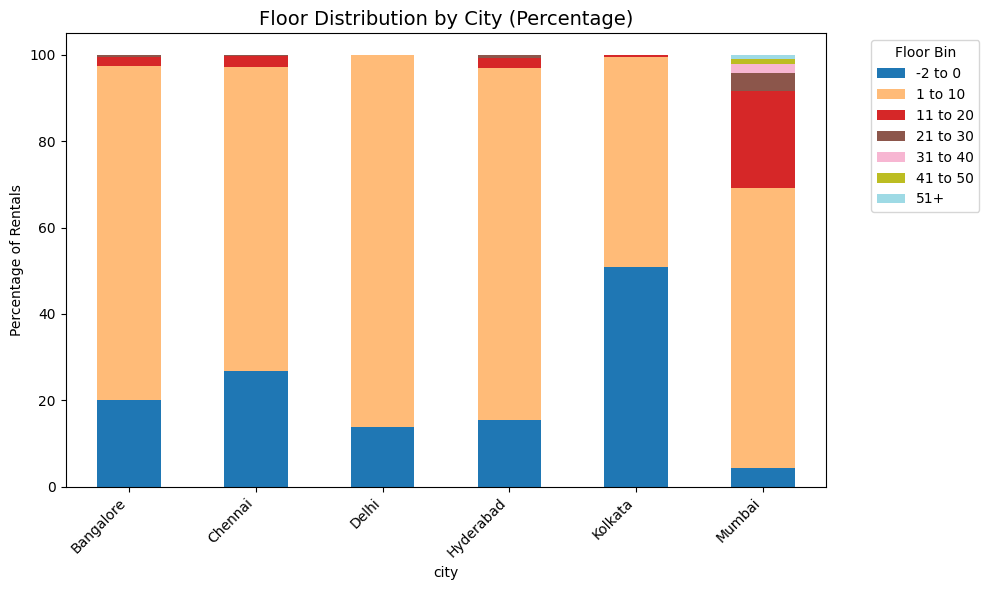

In [40]:
floor_dist = rent_ds_new.groupby(["city", "floor_bin"]).size().reset_index(name="count")

floor_percent = floor_dist.copy()
floor_percent["pct"] = floor_percent.groupby("city")["count"].transform(lambda x: x / x.sum() * 100)

# Pivot for stacked chart
pivot_floor = floor_percent.pivot(index="city", columns="floor_bin", values="pct").fillna(0)

# Plot
ax = pivot_floor.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)

plt.ylabel("Percentage of Rentals")
plt.title("Floor Distribution by City (Percentage)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Floor Bin", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

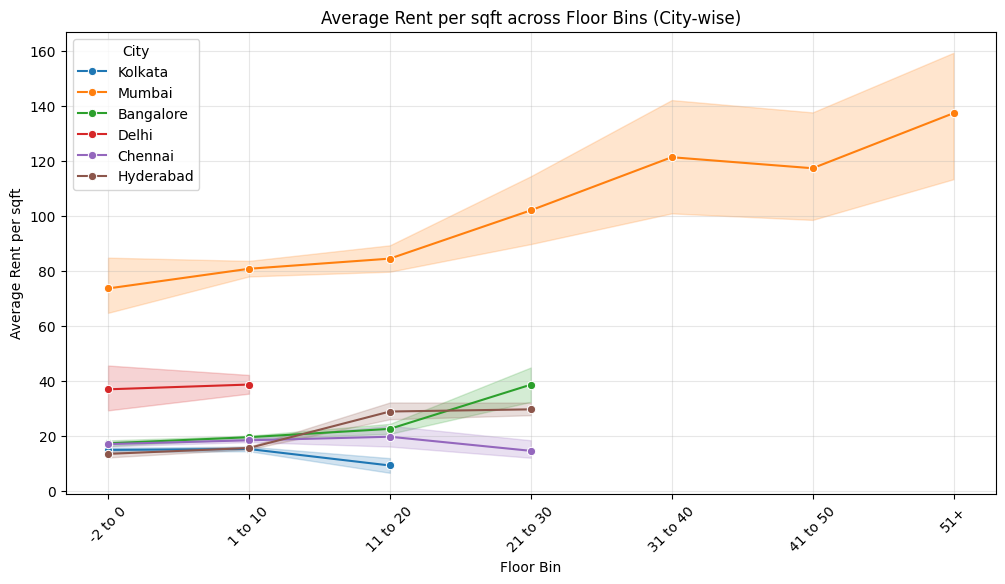

In [41]:
bin_order = ["-2 to 0", "1 to 10", "11 to 20", "21 to 30", "31 to 40", "41 to 50", "51+"]

# Make sure floor_bin is categorical BEFORE plotting
rent_ds_new["floor_bin"] = pd.Categorical(
    rent_ds_new["floor_bin"], 
    categories=bin_order, 
    ordered=True
)

# Now plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=rent_ds_new,
    x="floor_bin",
    y="rent_per_sqft",
    hue="city",
    marker="o"
)

plt.title("Average Rent per sqft across Floor Bins (City-wise)")
plt.ylabel("Average Rent per sqft")
plt.xlabel("Floor Bin")
plt.xticks(rotation=45)
plt.legend(title="City")
plt.grid(True, alpha=0.3)
plt.show()

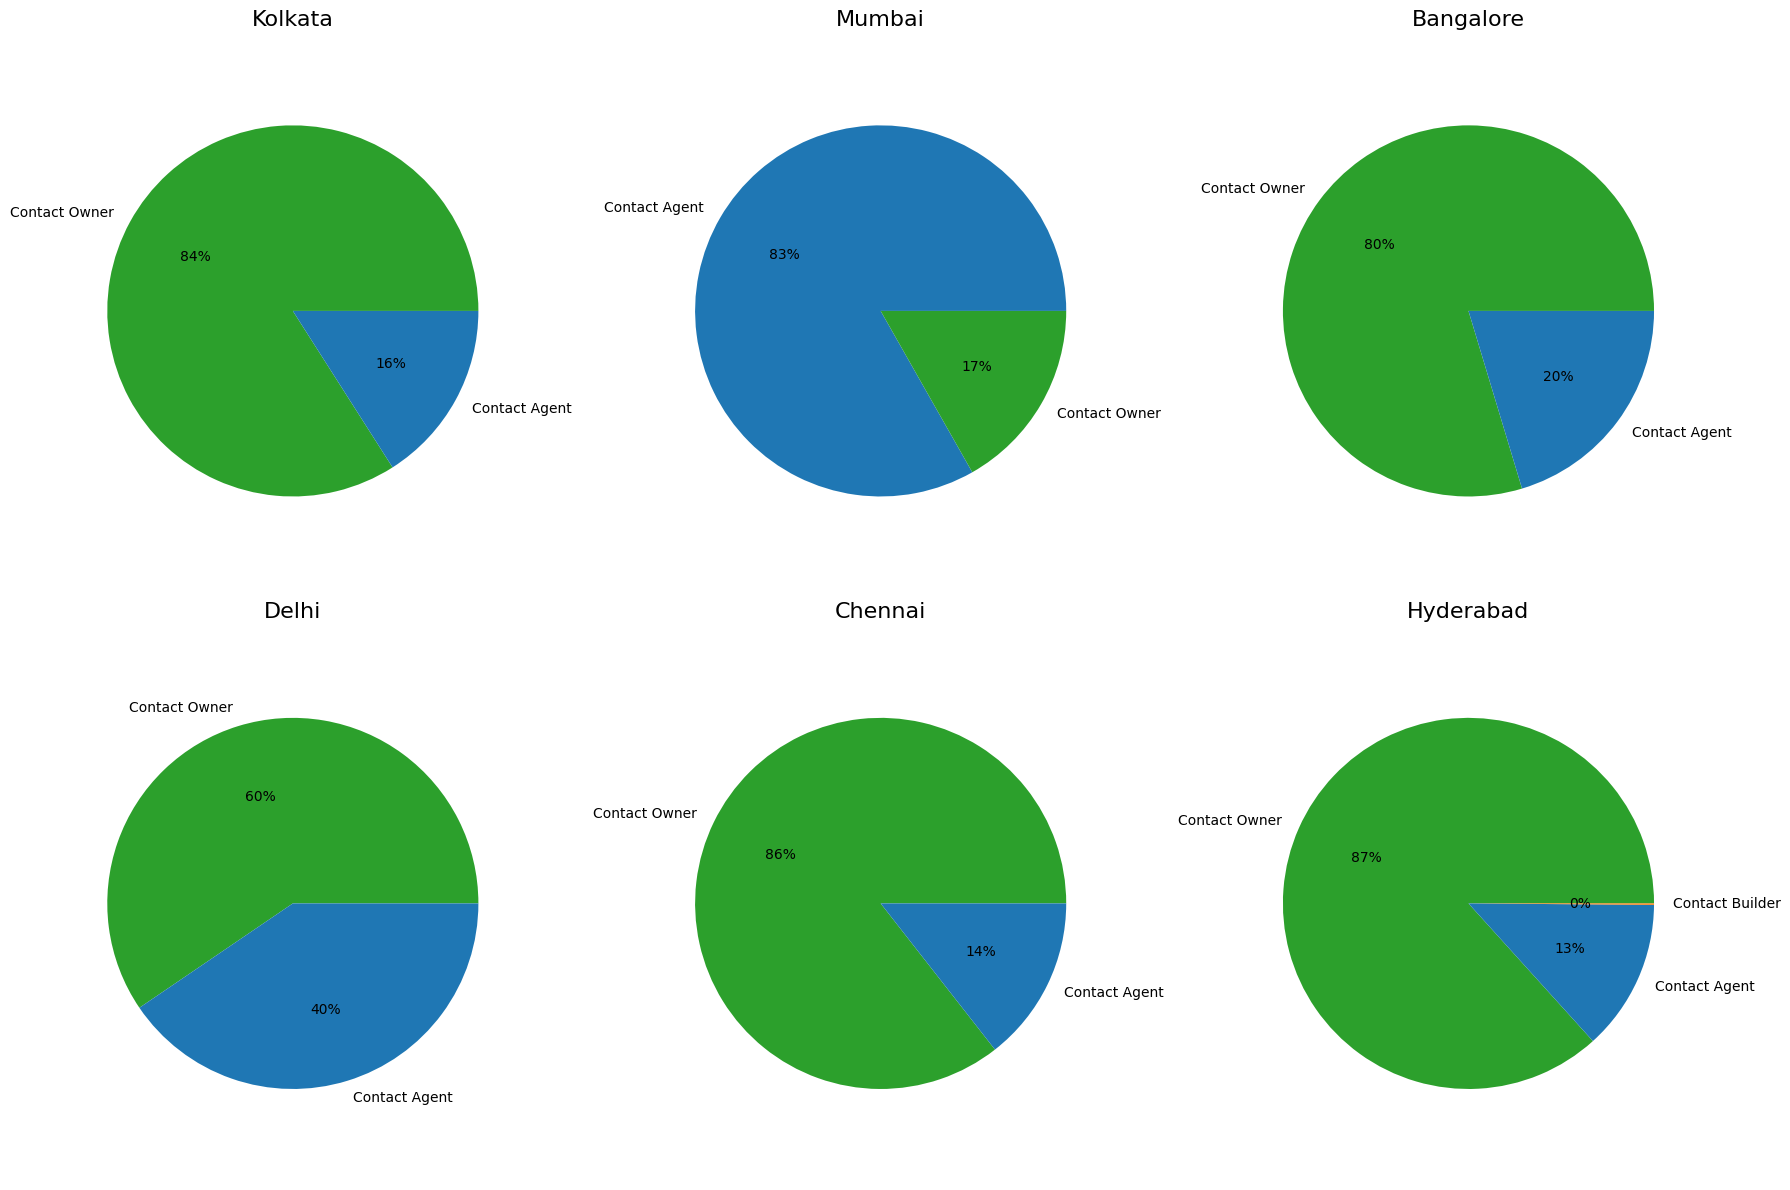

In [42]:
contacts = sorted(rent_ds_new['point_of_contact'].dropna().unique())
palette = sns.color_palette('tab10', n_colors=len(contacts))
color_dict = {contact: palette[i] for i, contact in enumerate(contacts)}

cities = rent_ds_new['city'].dropna().unique()
num_cities = len(cities)
num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows))

# Flatten axes for easier iteration
axs = axs.flatten()

for i, city in enumerate(cities):
    ax = axs[i]
    data = rent_ds_new[rent_ds_new['city'] == city]['point_of_contact'].value_counts()
    labels = data.index.tolist()
    colors = [color_dict[contact] for contact in labels]
    ax.pie(data, labels=labels, colors=colors, autopct='%1.0f%%', radius=1)
    ax.set_title(city, fontsize=16)
    ax.axis('equal')
    ax.set_aspect('equal')

for j in range(len(cities), num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

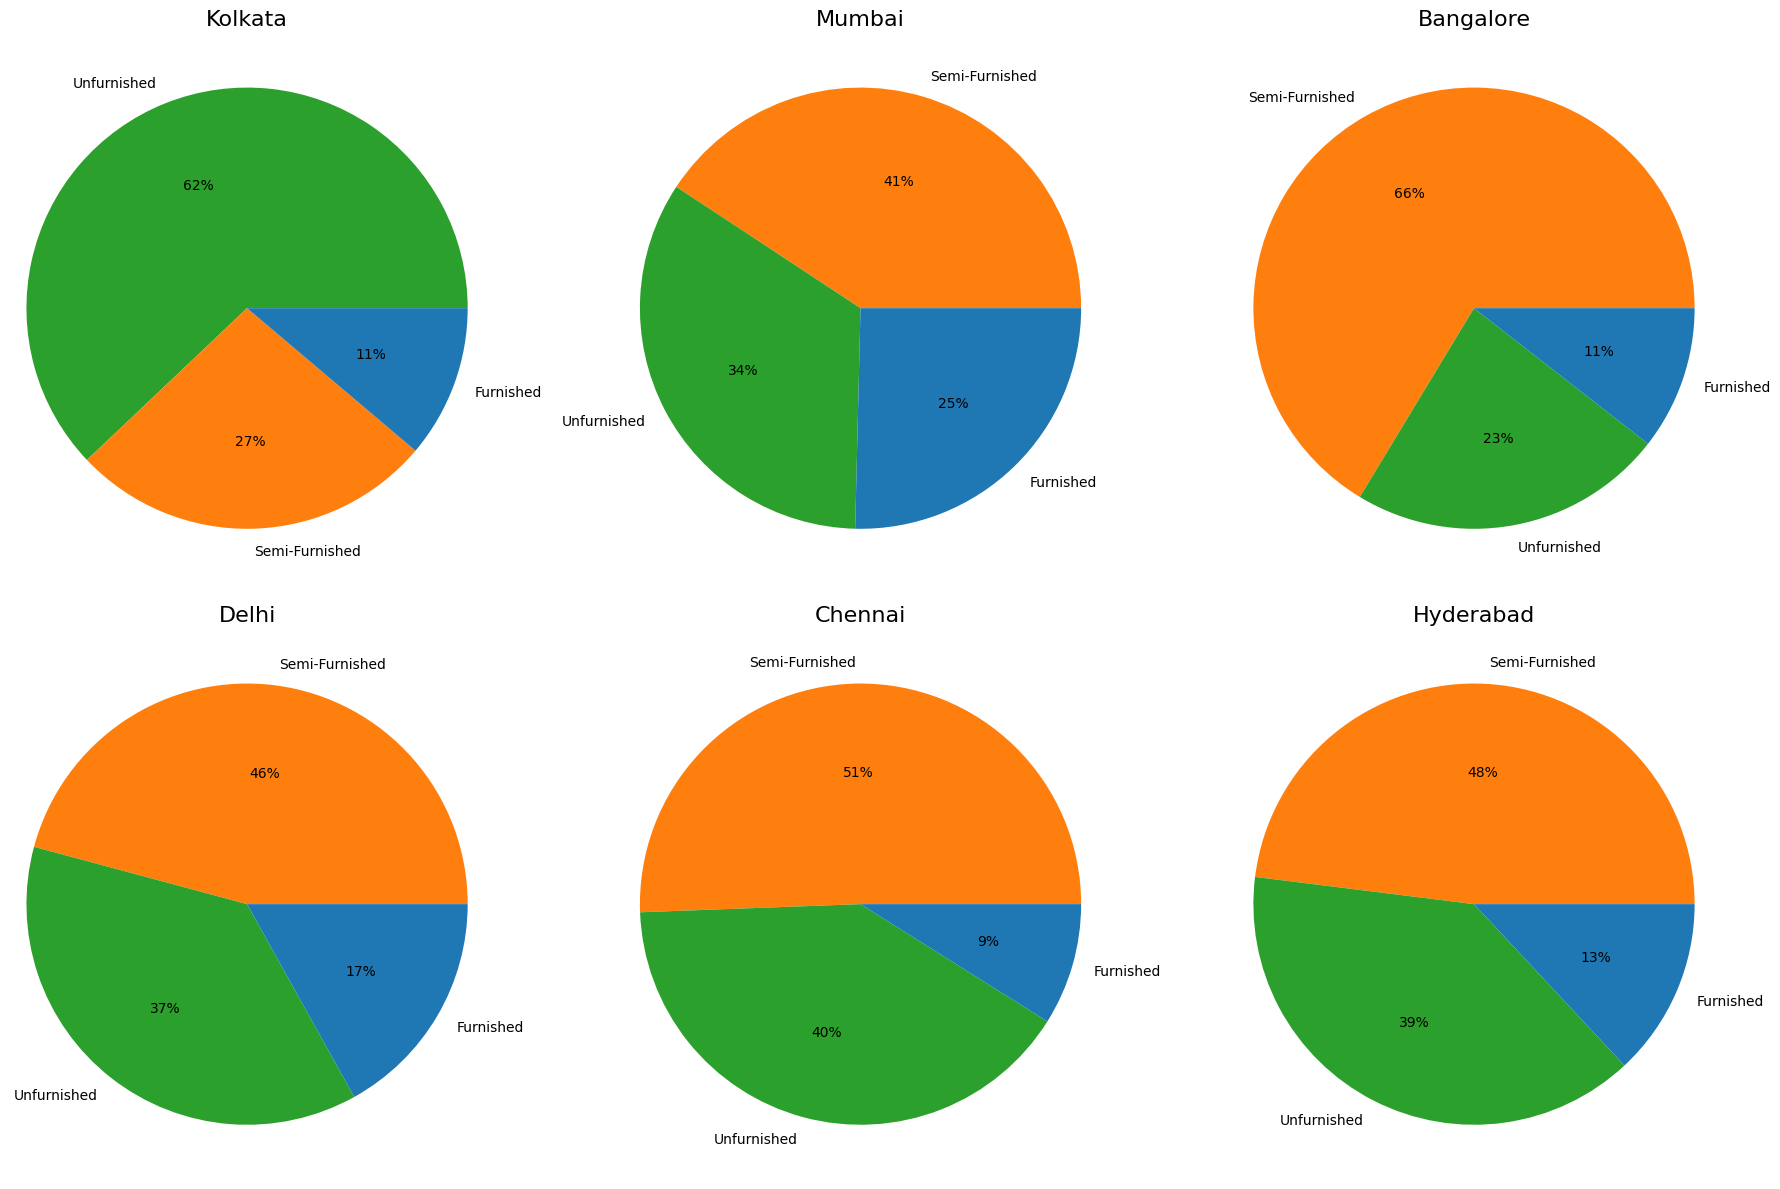

In [43]:
statuses = sorted(rent_ds_new['furnishing_status'].dropna().unique())
palette = sns.color_palette('tab10', n_colors=len(statuses))
color_dict = {status: palette[i] for i, status in enumerate(statuses)}

cities = rent_ds_new['city'].dropna().unique()
num_cities = len(cities)
num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows))

axs = axs.flatten()

for i, city in enumerate(cities):
    ax = axs[i]
    data = rent_ds_new[rent_ds_new['city'] == city]['furnishing_status'].value_counts()
    labels = data.index.tolist()
    colors = [color_dict[status] for status in labels]
    ax.pie(data, labels=labels, colors=colors, autopct='%1.0f%%', radius=1)
    ax.set_title(city, fontsize=16)
    ax.axis('equal')
    ax.set_aspect('equal')

for j in range(len(cities), num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

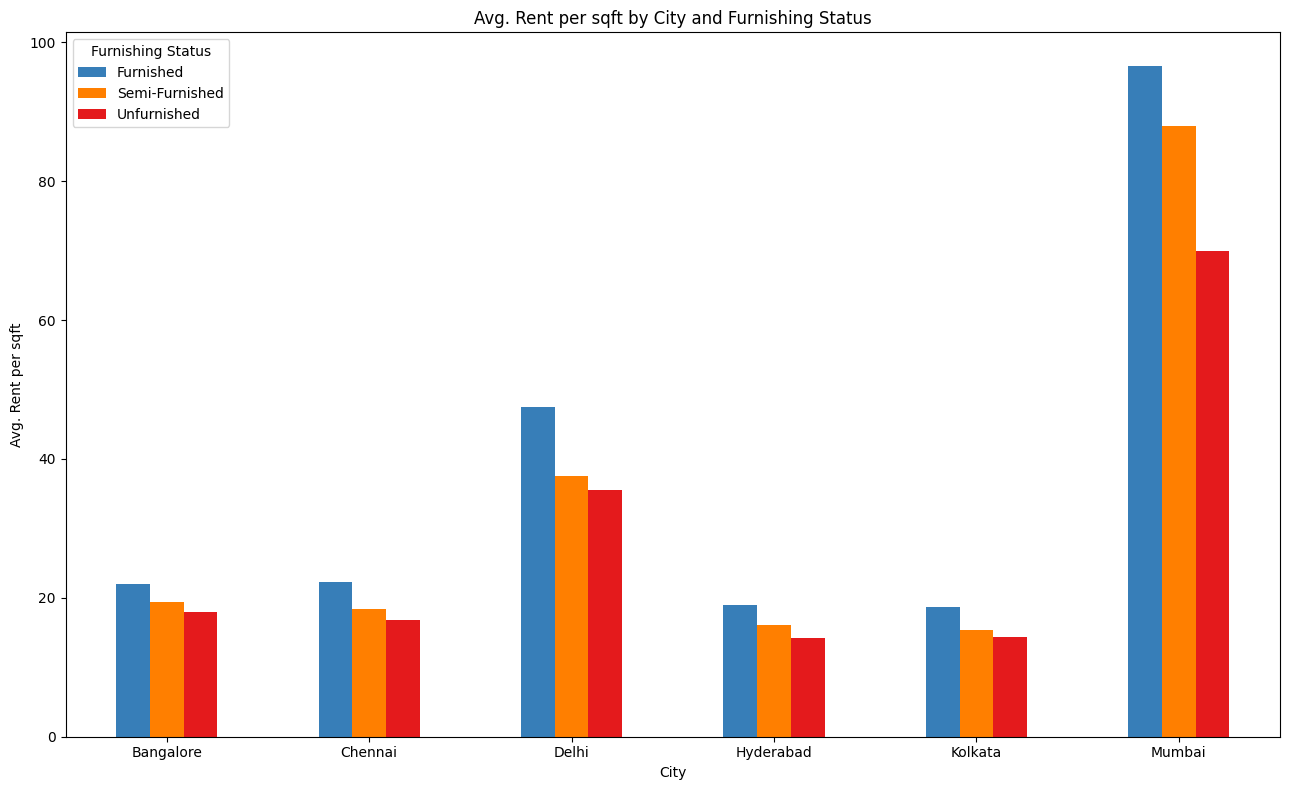

In [44]:

summary = rent_ds_new.groupby(['city', 'furnishing_status'])['rent_per_sqft'].mean().reset_index()

color_dict = {'Furnished': '#377eb8', 'Semi-Furnished': '#ff7f00', 'Unfurnished': '#e41a1c'}

# Pivot for plot
pivot = summary.pivot(index='city', columns='furnishing_status', values='rent_per_sqft')

# Plot
pivot.plot(kind='bar', color=[color_dict[s] for s in pivot.columns], figsize=(13,8))
plt.xlabel('City')
plt.ylabel('Avg. Rent per sqft')
plt.title('Avg. Rent per sqft by City and Furnishing Status')
plt.legend(title='Furnishing Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

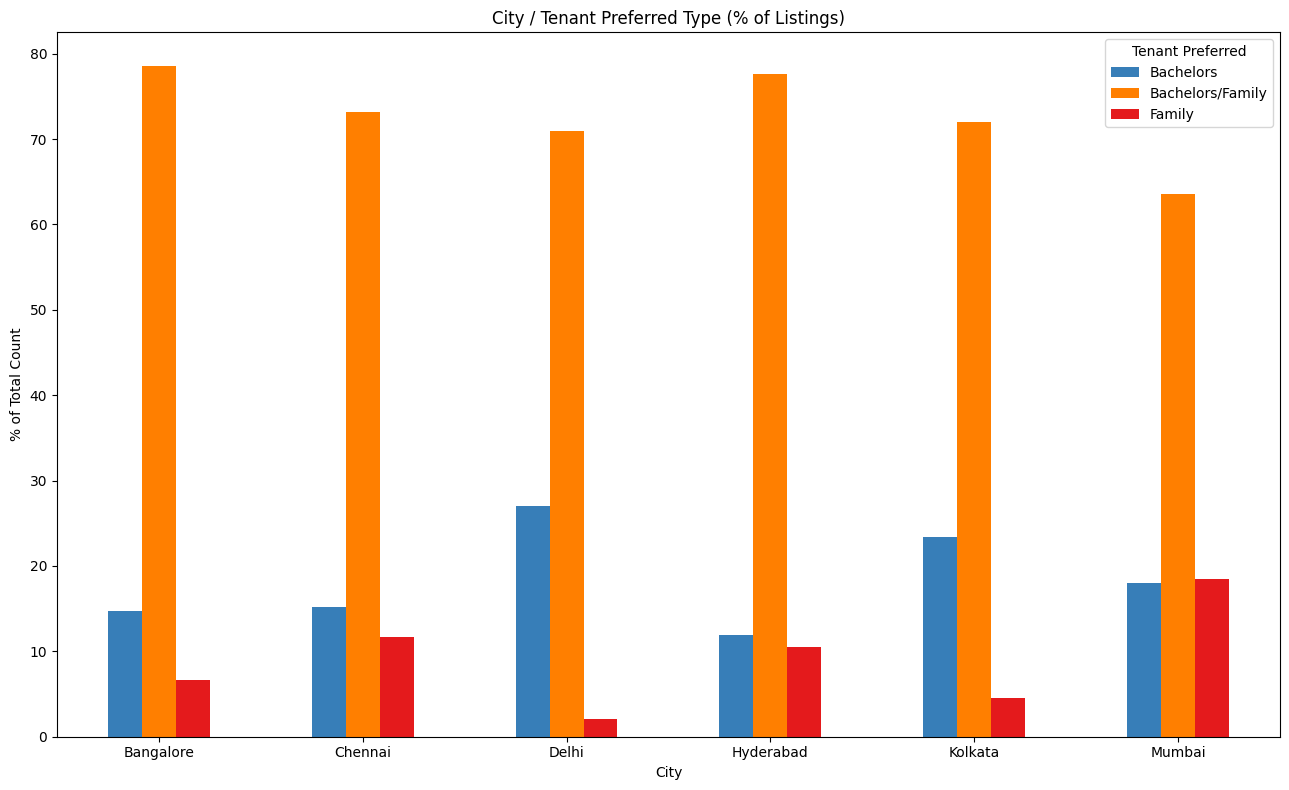

In [45]:
city_counts = rent_ds_new.groupby('city').size().reset_index(name='total')

tenant_counts = rent_ds_new.groupby(['city', 'tenant_preferred']).size().reset_index(name='count')

tenant_counts = tenant_counts.merge(city_counts, on='city')
tenant_counts['percent'] = tenant_counts['count'] / tenant_counts['total'] * 100

# Pivot for grouped bar chart
pivot = tenant_counts.pivot(index='city', columns='tenant_preferred', values='percent').fillna(0)

color_dict = {'Bachelors': '#377eb8', 'Bachelors/Family': '#ff7f00', 'Family': '#e41a1c'}

pivot.plot(kind='bar',
           color=[color_dict.get(s, '#777777') for s in pivot.columns],
           figsize=(13,8))

plt.xlabel('City')
plt.ylabel('% of Total Count')
plt.title('City / Tenant Preferred Type (% of Listings)')
plt.legend(title='Tenant Preferred')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
import statsmodels.formula.api as smf

model = smf.ols(
    formula=(
        'rent_per_sqft ~ C(tenant_preferred) + C(city) + '
        'C(furnishing_status) + size + C(area_type) + C(affordability)+ bathroom +mapped_floor'
    ),
    data=rent_ds_new
)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          rent_per_sqft   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1040.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:17:09   Log-Likelihood:                -18427.
No. Observations:                4423   AIC:                         3.689e+04
Df Residuals:                    4406   BIC:                         3.700e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [47]:
from sklearn.model_selection import train_test_split


rent_ds_model = rent_ds_new.drop(columns={'tenant_preferred' ,'posted_on','area_type','point_of_contact','rent_per_sqft','size_bin','floor_bin'})

# One-hot encode categorical columns
categorical_cols = ['city', 'furnishing_status', 'area_locality', 'affordability']
rent_ds_model = pd.get_dummies(rent_ds_model, columns=categorical_cols, drop_first=True)

# Features and target
X = rent_ds_model.drop(columns=['rent'])
y = rent_ds_model['rent']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape}")


Training samples: 3538, Testing samples: (885, 2105)


In [48]:
from xgboost import XGBRegressor

# Initialize XGBoost regressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successful!")

XGBoost model trained successful!


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Performance on Test Set:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

XGBoost Performance on Test Set:
RMSE: 12437.89
MAE: 5611.94
R²: 0.938


In [51]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}


In [52]:
# Initialize model with tuned hyperparameters
xgb_tuned = XGBRegressor(
    subsample=0.8,
    n_estimators=500,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Train the tuned model
xgb_tuned.fit(X_train, y_train)

# Predict and evaluate again
y_pred_tuned = xgb_tuned.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae = mean_absolute_error(y_test, y_pred_tuned)
r2 = r2_score(y_test, y_pred_tuned)

print(f"Tuned XGBoost Performance on Test Set:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

Tuned XGBoost Performance on Test Set:
RMSE: 12154.82
MAE: 5471.68
R²: 0.940


In [53]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [55]:
rf_preds = rf_model.predict(X_test)

# Calculate metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_preds))
mae_rf = mean_absolute_error(y_test, rf_preds)
r2_rf= r2_score(y_test, rf_preds)

print(f"Random Forest Performance on Test Set:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.3f}")

Random Forest Performance on Test Set:
RMSE: 12891.08
MAE: 5553.51
R²: 0.933


In [56]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_rs = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,  # Try 20 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

rf_rs.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_rs.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [57]:
# Initialize model with tuned hyperparameters
rf_tuned = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    random_state=42
)

# Train tuned model
rf_tuned.fit(X_train, y_train)

# Predict and evaluate
rf_tuned_preds = rf_tuned.predict(X_test)


rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, rf_tuned_preds))
mae_rf_tuned = mean_absolute_error(y_test, rf_tuned_preds)
r2_rf_tuned = r2_score(y_test, rf_tuned_preds)

print(f"Tuned Random Forest Performance on Test Set:")
print(f"RMSE: {rmse_rf_tuned:.2f}")
print(f"MAE: {mae_rf_tuned:.2f}")
print(f"R²: {r2_rf_tuned:.3f}")


Tuned Random Forest Performance on Test Set:
RMSE: 17293.76
MAE: 6955.66
R²: 0.879


In [58]:
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f" RMSE: {rmse:.2f}")
    print(f" MAE : {mae:.2f}")
    print(f" R²  : {r2:.3f}")
    return {"model": name, "rmse": rmse, "mae": mae, "r2": r2}

results = []
results.append(evaluate_model(xgb_tuned, X_test, y_test, "XGBoost"))
results.append(evaluate_model(rf_model, X_test, y_test, "RandomForest"))

df_results = pd.DataFrame(results)
print(df_results)


XGBoost Performance:
 RMSE: 12154.82
 MAE : 5471.68
 R²  : 0.940
RandomForest Performance:
 RMSE: 12891.08
 MAE : 5553.51
 R²  : 0.933
          model          rmse          mae        r2
0       XGBoost  12154.818633  5471.679688  0.940405
1  RandomForest  12891.083100  5553.509005  0.932966


In [59]:
from sklearn.model_selection import KFold


def evaluate_model_cv(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    rmse_list, mae_list, r2_list = [], [], []

    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)

        rmse_list.append(np.sqrt(mean_squared_error(y_test_cv, y_pred_cv)))
        mae_list.append(mean_absolute_error(y_test_cv, y_pred_cv))
        r2_list.append(r2_score(y_test_cv, y_pred_cv))

    results = {
        "RMSE Mean": np.mean(rmse_list),
        "RMSE Std": np.std(rmse_list),
        "MAE Mean": np.mean(mae_list),
        "MAE Std": np.std(mae_list),
        "R2 Mean": np.mean(r2_list),
        "R2 Std": np.std(r2_list)
    }
    return results

# Assuming xgb_tuned and rf_model are your model objects
xgb_cv_results = evaluate_model_cv(xgb_tuned, X, y, k=5)
rf_cv_results = evaluate_model_cv(rf_model, X, y, k=5)

cv_comparison_df = pd.DataFrame({
    "Metric": ["RMSE Mean", "RMSE Std", "MAE Mean", "MAE Std", "R2 Mean", "R2 Std"],
    "XGBoost": [xgb_cv_results[m] for m in ["RMSE Mean", "RMSE Std", "MAE Mean", "MAE Std", "R2 Mean", "R2 Std"]],
    "Random Forest": [rf_cv_results[m] for m in ["RMSE Mean", "RMSE Std", "MAE Mean", "MAE Std", "R2 Mean", "R2 Std"]]
})

print(cv_comparison_df)

      Metric       XGBoost  Random Forest
0  RMSE Mean  14508.767840   15238.387782
1   RMSE Std   2376.904154    2619.149544
2   MAE Mean   5653.932227    5782.982600
3    MAE Std    342.805012     356.264127
4    R2 Mean      0.919416       0.911182
5     R2 Std      0.013398       0.015577


In [60]:
# For XGBoost
xgb_preds = xgb_tuned.predict(X_test)
xgb_residuals = y_test - xgb_preds

# For Random Forest
rf_preds = rf_model.predict(X_test)
rf_residuals = y_test - rf_preds

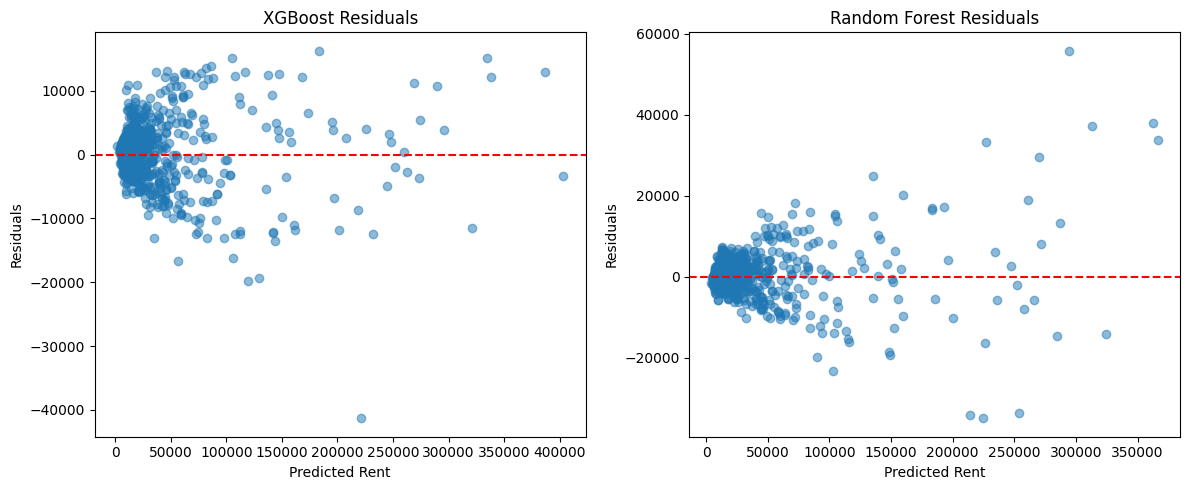

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(xgb_preds, xgb_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('XGBoost Residuals')
plt.xlabel('Predicted Rent')
plt.ylabel('Residuals')

plt.subplot(1,2,2)
plt.scatter(rf_preds, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Random Forest Residuals')
plt.xlabel('Predicted Rent')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

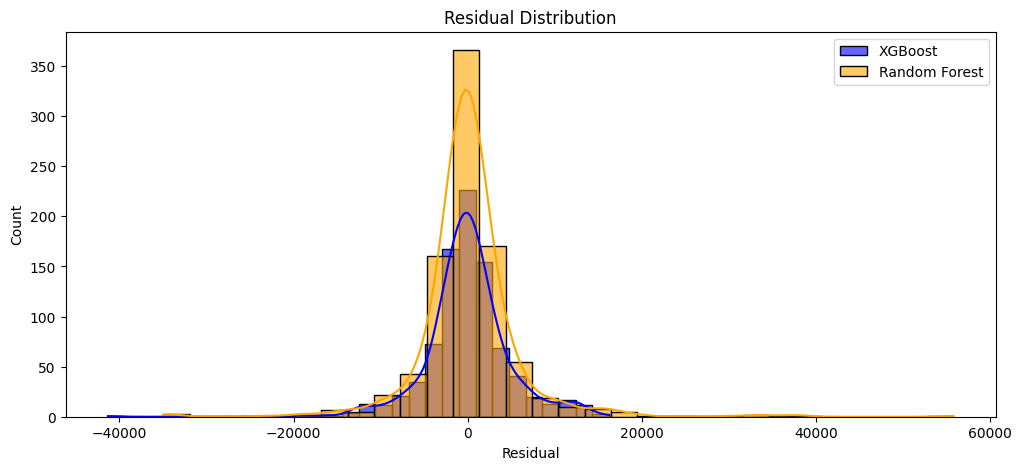

In [62]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(xgb_residuals, kde=True, color='blue', label='XGBoost', bins=30, alpha=0.6)
sns.histplot(rf_residuals, kde=True, color='orange', label='Random Forest', bins=30, alpha=0.6)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.legend()
plt.show()